In [1]:
"""
Functionality I want:
    Give current holding information      x
    Get current portfolio value           x
    Give total returns on asset           x
    Give returns since given buy / sell   x
    Automate trading212 activity download
    Calculate current portfolio returns   x
    Calculate portfolio returns since date on asset & total
    Include fucntionality for different date ranges
    Convert Key to asset full name.
"""

'\nFunctionality I want:\n    Give current holding information      x\n    Get current portfolio value           x\n    Give total returns on asset           x\n    Give returns since given buy / sell   x\n    Automate trading212 activity download\n    Calculate current portfolio returns   x\n    Calculate portfolio returns since date on asset & total\n    Include fucntionality for different date ranges\n    Convert Key to asset full name.\n'

In [2]:
import sys
import pandas as pd
import numpy as np
import pandas_datareader.data as wb
import datetime as dt
import matplotlib.pyplot as plt

sys.path.insert(0,'..')
import smartSS
import smartSS.useful_tools as ut
import smartSS.plot as plotSS
import smartSS.config as cfg

In [3]:
smartSS.trading212.history.keys()

Index(['Action', 'Time', 'ISIN', 'Ticker', 'Name', 'No. of shares',
       'Price / share', 'Currency (Price / share)', 'Exchange rate',
       'Result (GBP)', 'Total (GBP)', 'Withholding tax',
       'Currency (Withholding tax)', 'Charge amount (GBP)', 'Stamp duty (GBP)',
       'Stamp duty reserve tax (GBP)', 'Notes', 'ID', 'Unnamed: 18'],
      dtype='object')

In [4]:
tickers = np.unique(np.asarray(smartSS.trading212.history['Ticker'].values).astype(str))
tickers = [ticker for ticker in tickers if 'nan' not in ticker]

In [5]:
smartSS.config.ticker_map

{'GOOG': 'GOOGL',
 'IUSA.UK': 'IUSA',
 'BARC.UK': 'BARC',
 'GME': 'GME',
 'ECAR.UK': 'ECAR',
 'CNX1.UK': 'CNX1',
 'JDW.UK': 'JDW',
 'VUKE.UK': 'VUKE',
 'VAPX.UK': 'VAPX',
 'MA.US': 'MA',
 'INRG.UK': 'INRG',
 'HSBA.UK': 'HSBA',
 'MSFT.US': 'MSFT',
 'BP.UK': 'BP'}

In [6]:
wb_tickers = [key for key in smartSS.config.ticker_map.keys()]
wb_tickers

['GOOG',
 'IUSA.UK',
 'BARC.UK',
 'GME',
 'ECAR.UK',
 'CNX1.UK',
 'JDW.UK',
 'VUKE.UK',
 'VAPX.UK',
 'MA.US',
 'INRG.UK',
 'HSBA.UK',
 'MSFT.US',
 'BP.UK']

In [7]:
smartSS.trading212.history.head(10)

,Action,Time,ISIN,Ticker,Name,No. of shares,Price / share,Currency (Price / share),Exchange rate,Result (GBP),Total (GBP),Withholding tax,Currency (Withholding tax),Charge amount (GBP),Stamp duty (GBP),Stamp duty reserve tax (GBP),Notes,ID,Unnamed: 18
0,Deposit,2020-06-15 13:31:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,NaN,NaN,500.0,NaN,NaN,Transaction ID: 1825922278690091,8b48092e-e32d-4467-80c8-2802513c8fdf,NaN
1,Market buy,2020-06-15 13:33:00,IE0031442068,IUSA,iShares Core S&P 500 GBX,5.302789,2357.25,GBX,100,NaN,125.0,NaN,NaN,NaN,NaN,NaN,NaN,EOF263714287,NaN
2,Market buy,2020-06-15 13:34:00,IE00B1XNHC34,INRG,iShares Global Clean Energy,23.062731,542.00,GBX,100,NaN,125.0,NaN,NaN,NaN,NaN,NaN,NaN,EOF263723875,NaN
3,Market buy,2020-06-15 13:34:00,IE00B810Q511,VUKE,Vanguard FTSE 100 GBP,4.745634,26.34,GBP,1,NaN,125.0,NaN,NaN,NaN,NaN,NaN,NaN,EOF263733368,NaN
4,Market buy,2020-06-15 13:35:00,IE00B9F5YL18,VAPX,Vanguard FTSE Developed Asia Pacific ex Japan,7.150007,17.48,GBP,1,NaN,125.0,NaN,NaN,NaN,NaN,NaN,NaN,EOF263744135,NaN
5,Deposit,2020-09-03 10:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,NaN,NaN,500.0,NaN,NaN,Transaction ID: 1645991305229700,294e7bf2-708f-4245-8aa9-45bd04f416ed,NaN
6,Market buy,2020-09-03 10:57:00,IE0031442068,IUSA,iShares Core S&P 500 GBX,2.327097,2685.75,GBX,100,NaN,62.5,NaN,NaN,NaN,NaN,NaN,NaN,EOF408571558,NaN
7,Market buy,2020-09-03 10:57:00,IE00B1XNHC34,INRG,iShares Global Clean Energy,8.341675,749.25,GBX,100,NaN,62.5,NaN,NaN,NaN,NaN,NaN,NaN,EOF408571906,NaN
8,Market buy,2020-09-03 10:57:00,IE00B810Q511,VUKE,Vanguard FTSE 100 GBP,2.347858,26.62,GBP,1,NaN,62.5,NaN,NaN,NaN,NaN,NaN,NaN,EOF408572175,NaN
9,Market buy,2020-09-03 10:58:00,IE00B9F5YL18,VAPX,Vanguard FTSE Developed Asia Pacific ex Japan,3.323582,18.81,GBP,1,NaN,62.5,NaN,NaN,NaN,NaN,NaN,NaN,EOF408573529,NaN


In [8]:
#if type(smartSS.trading212.history['Time'].iloc[0])==str:
#    smartSS.trading212.history['Time'] = [dt.datetime.strptime(time, '%Y-%m-%d %H:%M:%S') for time in smartSS.trading212.history['Time']]

In [9]:
smartSS.config.web_df.head(10)

Attributes    Close                                                      \
Symbols        GOOG  IUSA.UK BARC.UK     GME  ECAR.UK  CNX1.UK   JDW.UK   
Date                                                                      
2019-03-01  1140.99  2107.71  152.51  11.364  5.10500  30060.5  1317.04   
2019-03-04  1147.80  2116.46  153.67  11.190  5.09150  30253.0  1306.13   
2019-03-05  1162.03  2121.70  154.44  11.219  5.08350  30440.5  1313.07   
2019-03-06  1157.86  2111.46  155.15  11.181  5.05400  30297.0  1288.28   
2019-03-07  1143.30  2097.46  152.30  11.210  4.93950  30082.5  1262.49   
2019-03-08  1142.32  2092.21  149.02  10.610  4.88375  29956.5  1268.44   
2019-03-11  1175.76  2113.21  151.11  10.891  4.93000  30436.5  1258.53   
2019-03-12  1193.20  2133.19  152.85  11.094  4.96100  30809.5  1265.47   
2019-03-13  1193.32  2126.33  153.82  11.200  4.94625  30737.0  1289.27   
2019-03-14  1185.55  2106.33  154.84  10.950  4.87525  30542.5  1281.33   

Attributes                          ...   Volume                               \
Symbols    VUKE.UK VAPX.UK   MA.US  ...  ECAR.UK CNX1.UK     JDW.UK   VUKE.UK   
Date                                ...                                         
2019-03-01  28.612  17.347  224.07  ...  15050.0  2749.0   101515.0  168066.0   
2019-03-04  28.731  17.380  223.13  ...   1355.0  2277.0   109187.0  213821.0   
2019-03-05  28.910  17.452  223.06  ...   5705.0  1149.0   380436.0  292436.0   
2019-03-06  28.960  17.442  221.34  ...   3484.0  1467.0   219173.0  269580.0   
2019-03-07  28.854  17.364  219.29  ...   9291.0  1119.0   174853.0  553848.0   
2019-03-08  28.645  17.213  218.76  ...    285.0  1651.0   111857.0  205489.0   
2019-03-11  28.743  17.315  222.50  ...    500.0  1127.0   107717.0  371070.0   
2019-03-12  28.849  17.415  223.78  ...   5600.0  6882.0   299558.0  519998.0   
2019-03-13  28.865  17.205  225.30  ...   1541.0   505.0   255100.0  257651.0   
2019-03-14  28.993  17.068  226.30  ...  26789.0   884.0  1021650.0  642983.0   

Attributes                                                                    
Symbols     VAPX.UK      MA.US   INRG.UK     HSBA.UK     MSFT.US       BP.UK  
Date                                                                          
2019-03-01  11539.0  3044331.0  116202.0  21106414.0  24155779.0  37912288.0  
2019-03-04  13323.0  3019950.0   13725.0  29856137.0  27349163.0  37257370.0  
2019-03-05   8859.0  2818525.0    9593.0  24448922.0  20082547.0  39505398.0  
2019-03-06  14742.0  2889732.0   25852.0  16199350.0  18179656.0  31931224.0  
2019-03-07   7939.0  3934986.0   62905.0  32866616.0  26044755.0  24067747.0  
2019-03-08  15377.0  2730039.0   24959.0  23439413.0  23454023.0  45562145.0  
2019-03-11  11828.0  2708088.0   11710.0  22444472.0  27229527.0  26177111.0  
2019-03-12  29271.0  2514077.0    5146.0  25181337.0  26860627.0  34665994.0  
2019-03-13   3003.0  2728542.0   21421.0  26990056.0  36502987.0  36512100.0  
2019-03-14   2802.0  2879016.0    2566.0  43192564.0  31620264.0  54162101.0  

[10 rows x 70 columns]

In [10]:
smartSS.config.web_df['Close','GOOG']

Date
2019-03-01    1140.99
2019-03-04    1147.80
2019-03-05    1162.03
2019-03-06    1157.86
2019-03-07    1143.30
               ...   
2021-10-11    2776.95
2021-10-12    2734.26
2021-10-13    2758.00
2021-10-14    2828.24
2021-10-15    2833.50
Name: (Close, GOOG), Length: 676, dtype: float64

# plot buys/sells with asset history 

In [11]:
buys = smartSS.trading212.buys
sells = smartSS.trading212.sells
buysells = smartSS.trading212.buysells
ticker_map = smartSS.config.ticker_map

0 GOOGL 69.87162045150066
1 GOOGL 45.32985312409349
2 GOOGL -0.09306587405308164
TOTAL:  GOOGL 115.10840770154095


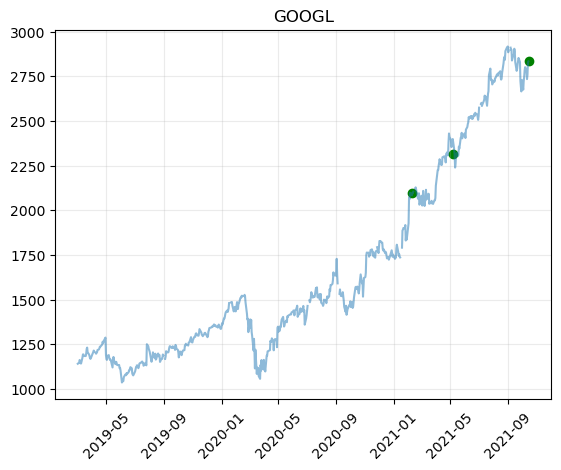

0 IUSA 46.359635105549984
1 IUSA 12.700130294824994
2 IUSA 30.325906437425033
TOTAL:  IUSA 89.38567183780003


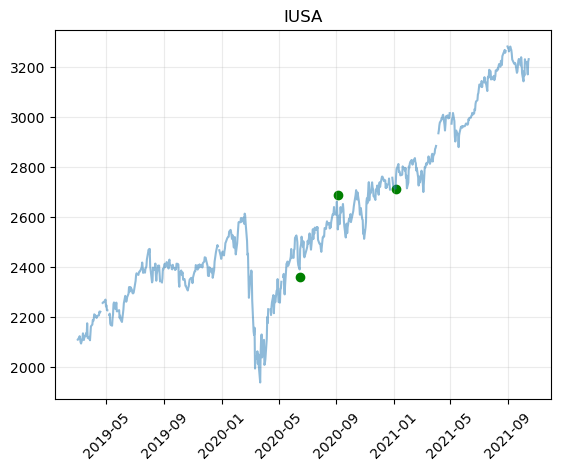

0 BARC 18.450100000719992
TOTAL:  BARC 18.548093664819994


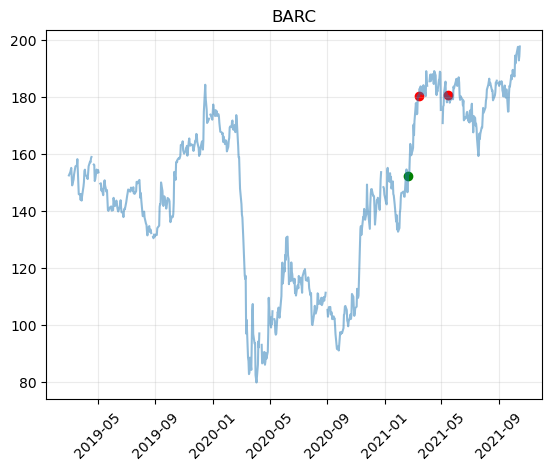

0 GME -187.68750632809625
1 GME -15.958266491610821
TOTAL:  GME -203.64577281970708


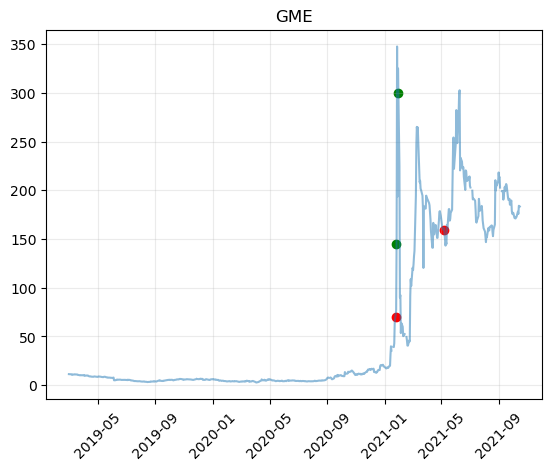

0 ECAR 5.854475054329214
TOTAL:  ECAR 5.854475054329214


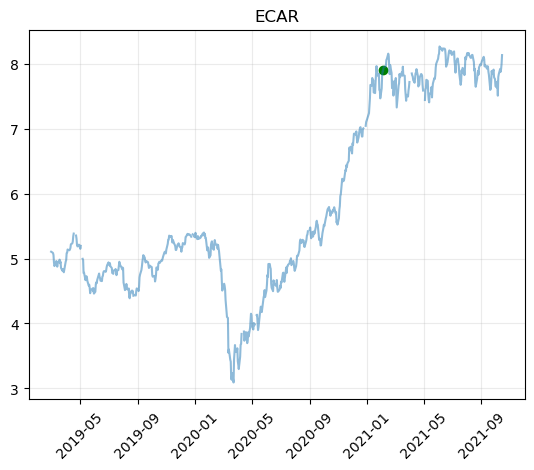

0 CNX1 29.17292331280001
1 CNX1 13.055995649000025
TOTAL:  CNX1 42.22891896179999


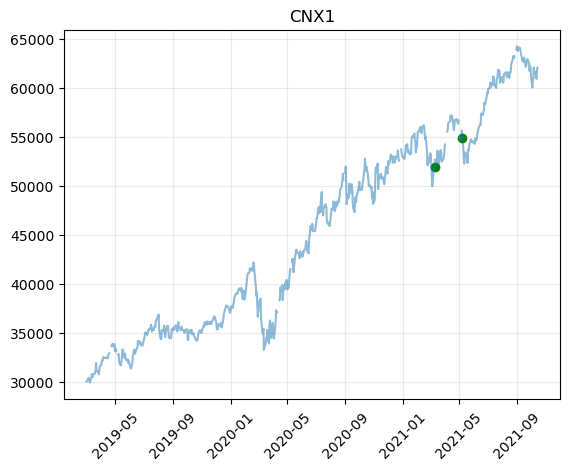

0 JDW -22.799999999999997
1 JDW -17.7375162492
TOTAL:  JDW -40.53751624919998


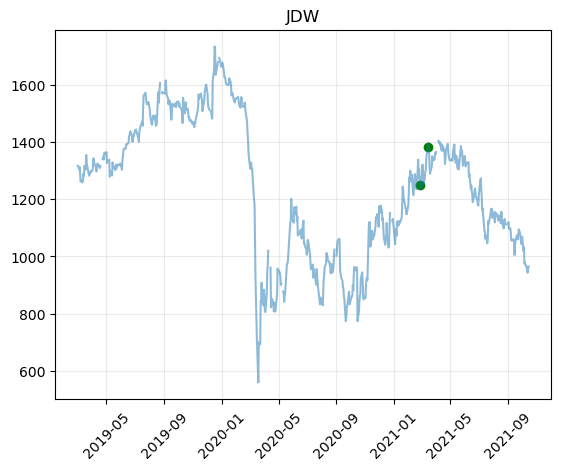

0 VUKE 14.331814680000008
1 VUKE 6.433130919999996
2 VUKE -0.3212100599999985
3 VUKE 1.6362489149999995
4 VUKE 12.587828555000016
5 VUKE 1.4683016700000024
TOTAL:  VUKE 36.13611467999999


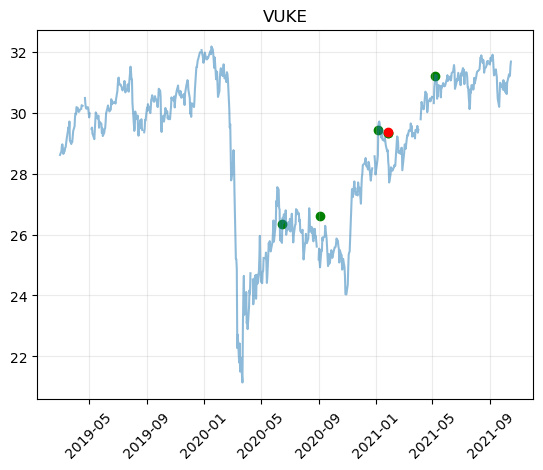

0 VAPX 29.815529189999992
1 VAPX 9.438972880000001
2 VAPX -6.151797520000031
TOTAL:  VAPX 33.10270455


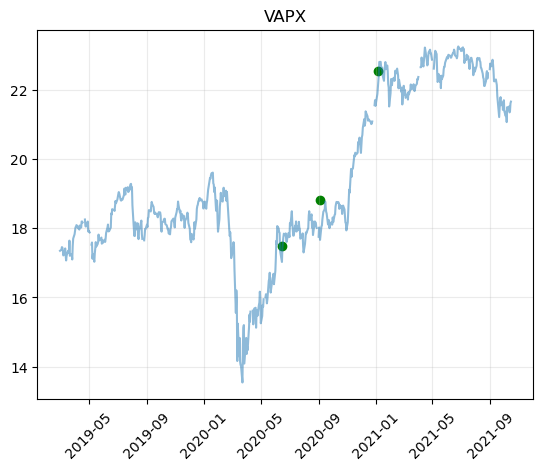

0 MA -9.41937129406702
TOTAL:  MA -9.41937129406702


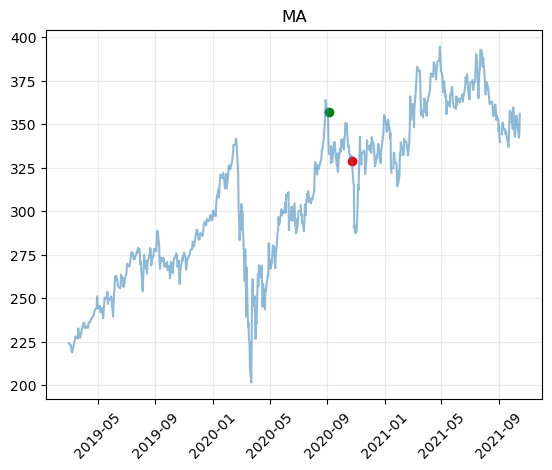

0 INRG 116.351475877
1 INRG 24.795628937500005
2 INRG 45.298737440249965
3 INRG -0.3167851342499999
4 INRG -29.828621220600013
TOTAL:  INRG 156.30043589989998


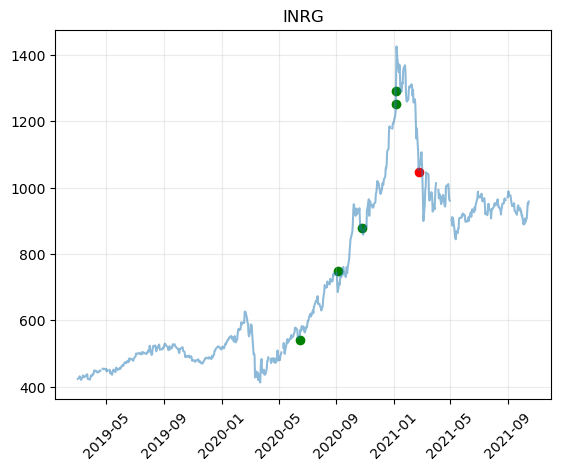

0 HSBA -3.1154493967999883
1 HSBA -0.9507266118000004
TOTAL:  HSBA -4.066176008600024


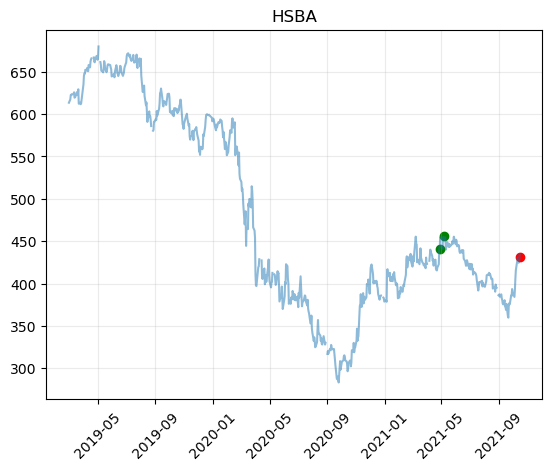

0 MSFT 1.017353938309796
1 MSFT 5.028173606982222
2 MSFT 4.292935523608151
TOTAL:  MSFT 5.26818752980202


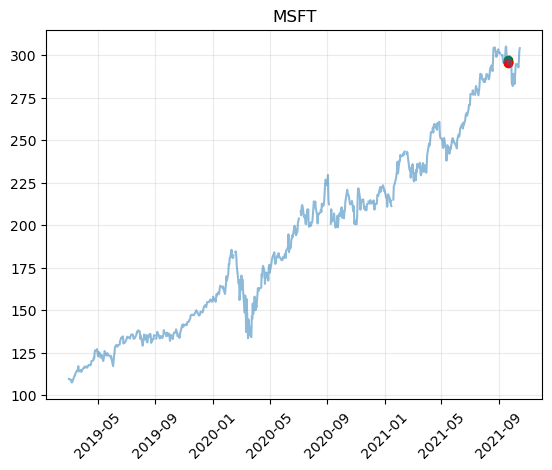

0 BP 0.9970189100000084
TOTAL:  BP 0.9970189100000084


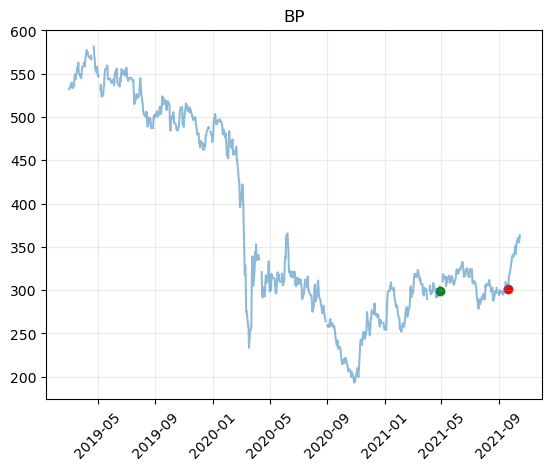

In [12]:
for ticker in wb_tickers:
    for ibuy in range(len(buys[buys['Ticker']==ticker_map[ticker]])):
        returns = ut.get_asset_returns_since_buy(ticker_map[ticker],ibuy)
        print(ibuy, ticker_map[ticker], returns)

    returns_tot = ut.get_asset_returns_total(ticker_map[ticker])
    print('TOTAL: ', ticker_map[ticker],returns_tot)
    
    plotSS.plot_activity_on_history(ticker_map[ticker])


# portfolio value (GBP) and other calculations

In [13]:
ut.get_portfolio_value()

2632.1862095268943

In [14]:
ut.get_portolio_returns_total()

218.13620952689462

In [15]:
history[history['Action']=='Deposit']['Total (GBP)'].sum()

In [16]:
# get returns since date

ut.get_asset_info('GOOGL',dt.datetime(2021,2,28))


PORTFOLIO_STARTDATE=dt.datetime(2020,4,1)

def asset_returns(ticker,start_date=PORTFOLIO_STARTDATE,end_date=dt.datetime.now()):
    #get asset value in portfolio at start date and current date
    value_start = ut.get_asset_info(ticker,start_date)['Value']
    value_start*=cfg.forex[ut.get_asset_info(ticker,start_date)['Currency']]
    value_now = ut.get_asset_info(ticker,end_date)['Value']
    value_now*=cfg.forex[ut.get_asset_info(ticker,end_date)['Currency']]
    
    # sum ticker buys and sells since date
    buys = smartSS.trading212.buys.loc[(smartSS.trading212.buys['Ticker']==ticker) & 
                                   (smartSS.trading212.buys['Time']>start_date) &
                                   (smartSS.trading212.buys['Time']<=end_date)]
    sells = smartSS.trading212.sells.loc[(smartSS.trading212.sells['Ticker']==ticker) & 
                                     (smartSS.trading212.sells['Time']>start_date) &
                                     (smartSS.trading212.sells['Time']<=end_date)]
    # return net profit/loss since date
    return value_now-value_start-buys['Total (GBP)'].sum()+sells['Total (GBP)'].sum()
    
def portfolio_returns(start_date=PORTFOLIO_STARTDATE,end_date=dt.datetime.now()):
    # sum returns for each asset between dates
    returns=0
    for ticker in cfg.ticker_map.values():
        returns+=asset_returns(ticker,start_date,end_date)
    return returns
    
def plot_portfolio_value():
    # portfolio start date
    startdate=PORTFOLIO_STARTDATE
    
    ndays = (dt.datetime.now()-startdate).days
    date_list = [startdate + dt.timedelta(days=x) for x in range(ndays)]
    returns = [portfolio_returns(end_date=date) for date in date_list]
    plt.plot(date_list,returns)
    plt.show()

In [17]:
import smartSS
ut.get_asset_info('GOOGL',dt.datetime(2021,2,28))

{'Ticker': 'GOOGL',
 'Date': Timestamp('2021-03-01 00:00:00'),
 'Holding': 0.13069502,
 'Value': 272.0429910802,
 'Price': 2081.51,
 'Currency': 'USD'}

In [18]:
asset_returns('GOOGL')

115.99917989131063

In [19]:
portfolio_returns(dt.datetime(2020,2,8))

239.14620952689444

In [20]:
smartSS.trading212.history[smartSS.trading212.history['Action']=='Deposit']['Total (GBP)'].sum()

2377.0

In [21]:
2308.96-2177

131.96000000000004

In [22]:
ut.get_portolio_returns_total()

218.13620952689462

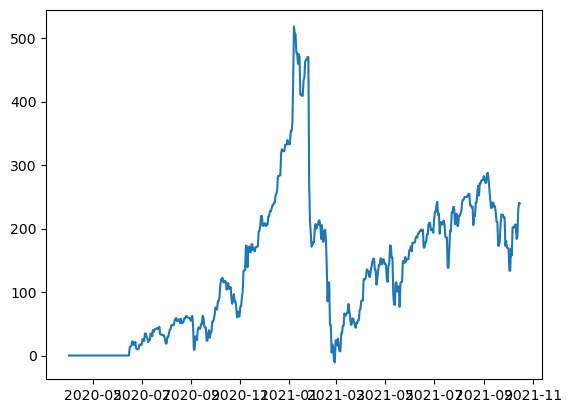

In [23]:
plot_portfolio_value()

In [24]:
# portfolio start date
startdate=PORTFOLIO_STARTDATE

ndays = (dt.datetime.now()-startdate).days
date_list = np.asarray([startdate + dt.timedelta(days=x) for x in range(ndays)])
returns = portfolio_returns(end_date=date_list)
plt.plot(date_list,returns)
plt.show()

ValueError: ('Lengths must match to compare', (39,), (564,))

In [ ]:
plotSS.plot_portfolio_value()